# Chemeleon: Generative AI for Crystal Structure Exploration

In this notebook, we'll explore how to use Chemeleon for generating crystal structures. We'll cover:

1. Crystal Structure Prediction (CSP) - generating structures for specific formulas
2. De Novo Generation (DNG) - generating novel structures without constraints
3. Analysing and visualizing the generated structures
4. Comparing with traditional structure prediction methods

## Setup and Installation

In [19]:
# First, let's check if we're in Google Colab
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    print("Running in Google Colab")
    # Clone the CHEMELEON repository
    !git clone https://github.com/hspark1212/chemeleon-dng.git
    %cd chemeleon-dng
    !pip install -e .
else:
    print("Running locally")
    # Ensure you have the package installed locally
    # You should have already cloned and installed chemeleon-dng

Running locally


In [20]:
# Import required libraries
import os
import sys
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pymatgen.core import Structure, Composition
from pymatgen.analysis.structure_matcher import StructureMatcher
from pymatgen.io.cif import CifWriter
import warnings
warnings.filterwarnings('ignore')

# Add chemeleon-dng to path if running locally
if not IN_COLAB:
    chemeleon_path = Path('/home/ryan/informatics/chemeleon-dng')
    if chemeleon_path.exists():
        sys.path.insert(0, str(chemeleon_path))

print("Libraries imported successfully!")

Libraries imported successfully!


## Part 1: Crystal Structure Prediction (CSP)

CSP mode allows us to generate crystal structures for specific chemical formulas. This is particularly useful when you know the composition but want to explore possible crystal structures.

In [21]:
# Let's start with a simple example - generating structures for NaCl
# We'll use the command-line interface first to understand the process

import subprocess
import tempfile

# Create a temporary directory for outputs
output_dir = tempfile.mkdtemp(prefix="chemeleon_csp_")
print(f"Output directory: {output_dir}")

# Generate 5 structures for NaCl
if IN_COLAB:
    cmd = f"python scripts/sample.py --task=csp --formulas='NaCl' --num_samples=5 --output_dir='{output_dir}' --device=cpu"
else:
    cmd = f"cd /home/ryan/informatics/chemeleon-dng && python scripts/sample.py --task=csp --formulas='NaCl' --num_samples=5 --output_dir='{output_dir}' --device=cpu"

print(f"Running: {cmd}")
result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
print(result.stdout)
if result.stderr:
    print("Errors:", result.stderr)

Output directory: /tmp/chemeleon_csp_tvkh1a2c
Running: cd /home/ryan/informatics/chemeleon-dng && python scripts/sample.py --task=csp --formulas='NaCl' --num_samples=5 --output_dir='/tmp/chemeleon_csp_tvkh1a2c' --device=cpu
Using device: cpu
Checkpoints already exist.
Using checkpoint path: ckpts/chemeleon_csp_alex_mp_20_v0.0.2.ckpt
The generated structures will be saved in: /tmp/chemeleon_csp_tvkh1a2c
Generating 5 samples for each formula: ['NaCl']
Generating batch #1 with 5 samples.
The 5 generated structures saved in JSON format at: /tmp/chemeleon_csp_tvkh1a2c/generated_structures.json.gz

Errors: 
Sampling: 100%|█████████████████████████████| 256/256 [00:01<00:00, 150.88it/s]



In [22]:
# Let's examine the generated structures
from pathlib import Path
import glob

# Find all generated CIF files
cif_files = glob.glob(os.path.join(output_dir, "*.cif"))
print(f"Found {len(cif_files)} generated structures:")

# Load and analyze the structures
generated_structures = []
for cif_file in cif_files:
    structure = Structure.from_file(cif_file)
    generated_structures.append(structure)
    print(f"\n{Path(cif_file).name}:")
    print(f"  Formula: {structure.composition.reduced_formula}")
    print(f"  Space group: {structure.get_space_group_info()[0]}")
    print(f"  Volume: {structure.volume:.2f} Ų")
    print(f"  Density: {structure.density:.2f} g/cm³")

Found 5 generated structures:

sample_0_ClNa.cif:
  Formula: NaCl
  Space group: F-43m
  Volume: 61.69 Ų
  Density: 1.57 g/cm³

sample_1_ClNa.cif:
  Formula: NaCl
  Space group: C2/m
  Volume: 46.16 Ų
  Density: 2.10 g/cm³

sample_2_ClNa.cif:
  Formula: NaCl
  Space group: R3m
  Volume: 59.66 Ų
  Density: 1.63 g/cm³

sample_3_ClNa.cif:
  Formula: NaCl
  Space group: Fm-3m
  Volume: 46.09 Ų
  Density: 2.11 g/cm³

sample_4_ClNa.cif:
  Formula: NaCl
  Space group: Fm-3m
  Volume: 45.69 Ų
  Density: 2.12 g/cm³


### Multiple Formulas

CHEMELEON can generate structures for multiple formulas in a single run. Let's try some more complex examples:

In [23]:
# Generate structures for multiple formulas relevant to energy materials
formulas_list = ['LiCoO2', 'LiFePO4', 'Li2MnO3']

# Create output directory
output_dir_multi = tempfile.mkdtemp(prefix="chemeleon_multi_")

# Generate 3 structures for each formula
formulas_str = ','.join(formulas_list)
if IN_COLAB:
    cmd = f"python scripts/sample.py --task=csp --formulas='{formulas_str}' --num_samples=3 --output_dir='{output_dir_multi}' --device=cpu"
else:
    cmd = f"cd /home/ryan/informatics/chemeleon-dng && python scripts/sample.py --task=csp --formulas='{formulas_str}' --num_samples=3 --output_dir='{output_dir_multi}' --device=cpu"

print(f"Generating structures for: {formulas_list}")
result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
print(result.stdout)

Generating structures for: ['LiCoO2', 'LiFePO4', 'Li2MnO3']
Using device: cpu
Checkpoints already exist.
Using checkpoint path: ckpts/chemeleon_csp_alex_mp_20_v0.0.2.ckpt
The generated structures will be saved in: /tmp/chemeleon_multi_ndpiyk_n
Generating 3 samples for each formula: ['LiCoO2', 'LiFePO4', 'Li2MnO3']
Generating batch #1 with 3 samples.
Generating batch #2 with 3 samples.
Generating batch #3 with 3 samples.
The 9 generated structures saved in JSON format at: /tmp/chemeleon_multi_ndpiyk_n/generated_structures.json.gz



In [24]:
# Analyze the generated battery material structures
battery_structures = {}
cif_files_multi = glob.glob(os.path.join(output_dir_multi, "*.cif"))

for cif_file in cif_files_multi:
    structure = Structure.from_file(cif_file)
    formula = structure.composition.reduced_formula
    
    if formula not in battery_structures:
        battery_structures[formula] = []
    battery_structures[formula].append(structure)

# Compare structures for each formula
matcher = StructureMatcher()

for formula, structures in battery_structures.items():
    print(f"\n{formula}: Generated {len(structures)} structures")
    
    # Check for unique structures
    unique_structures = []
    for s in structures:
        is_unique = True
        for u in unique_structures:
            if matcher.fit(s, u):
                is_unique = False
                break
        if is_unique:
            unique_structures.append(s)
    
    print(f"  Unique structures: {len(unique_structures)}")
    for i, s in enumerate(unique_structures):
        print(f"  Structure {i+1}: SG {s.get_space_group_info()[0]}, V={s.volume:.1f} ų")


LiCoO2: Generated 3 structures
  Unique structures: 2
  Structure 1: SG R-3m, V=34.3 ų
  Structure 2: SG Cm, V=36.6 ų

LiFePO4: Generated 3 structures
  Unique structures: 2
  Structure 1: SG P1, V=89.0 ų
  Structure 2: SG P1, V=87.9 ų

Li2MnO3: Generated 3 structures
  Unique structures: 2
  Structure 1: SG Pm, V=55.3 ų
  Structure 2: SG P1, V=50.3 ų


## Part 2: De Novo Generation (DNG)

DNG mode generates completely novel crystal structures without specifying the composition. This is useful for exploring chemical space and discovering unexpected materials.

In [25]:
# Generate 20 random crystal structures
output_dir_dng = tempfile.mkdtemp(prefix="chemeleon_dng_")

if IN_COLAB:
    cmd = f"python scripts/sample.py --task=dng --num_samples=20 --batch_size=10 --output_dir='{output_dir_dng}' --device=cpu"
else:
    cmd = f"cd /home/ryan/informatics/chemeleon-dng && python scripts/sample.py --task=dng --num_samples=20 --batch_size=10 --output_dir='{output_dir_dng}' --device=cpu"

print("Generating novel crystal structures...")
result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
print(result.stdout)

Generating novel crystal structures...
Using device: cpu
Checkpoints already exist.
Using checkpoint path: ckpts/chemeleon_dng_alex_mp_20_v0.0.2.ckpt
The generated structures will be saved in: /tmp/chemeleon_dng_eun9ztk2
Generating 20 samples with atom distributions: mp-20
Generating batch #1 with 10 samples.
Generating batch #2 with 10 samples.
The 20 generated structures saved in JSON format at: /tmp/chemeleon_dng_eun9ztk2/generated_structures.json.gz



In [26]:
# Analyze the diversity of generated structures
dng_cif_files = glob.glob(os.path.join(output_dir_dng, "*.cif"))
print(f"Generated {len(dng_cif_files)} novel structures")

# Collect composition and structural information
compositions = []
space_groups = []
volumes = []
elements_count = {}

for cif_file in dng_cif_files:
    structure = Structure.from_file(cif_file)
    comp = structure.composition
    
    compositions.append(comp.reduced_formula)
    space_groups.append(structure.get_space_group_info()[0])
    volumes.append(structure.volume / len(structure))
    
    # Count elements
    for element in comp.elements:
        elem_str = str(element)
        elements_count[elem_str] = elements_count.get(elem_str, 0) + 1

# Display statistics
print(f"\nUnique compositions: {len(set(compositions))}")
print(f"Unique space groups: {len(set(space_groups))}")
print(f"\nMost common elements:")
sorted_elements = sorted(elements_count.items(), key=lambda x: x[1], reverse=True)[:10]
for elem, count in sorted_elements:
    print(f"  {elem}: {count} structures")

Generated 20 novel structures

Unique compositions: 20
Unique space groups: 10

Most common elements:
  Ba: 4 structures
  Ni: 3 structures
  Ag: 3 structures
  Pb: 3 structures
  Al: 3 structures
  Sr: 3 structures
  Tl: 3 structures
  Tm: 2 structures
  Ca: 2 structures
  O: 2 structures


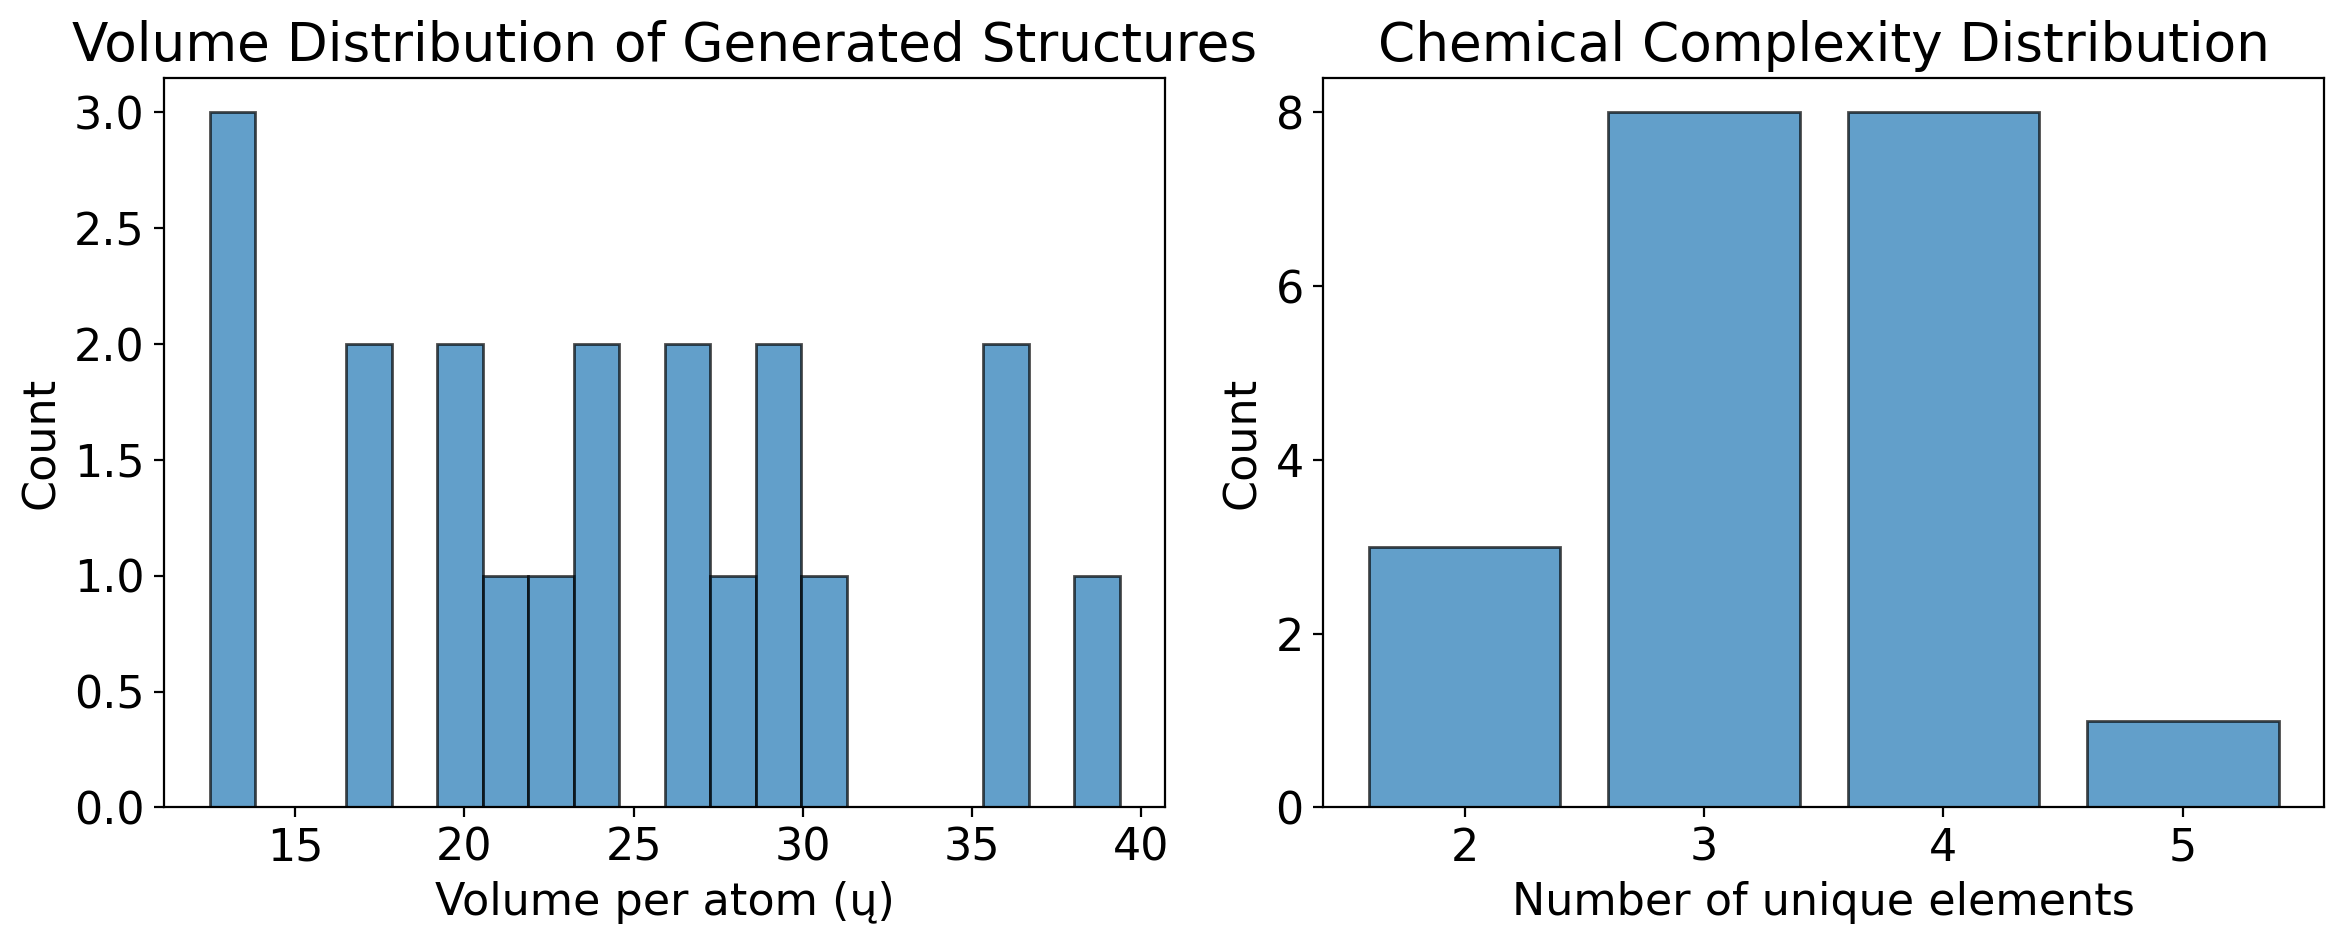

In [27]:
# Visualize the distribution of generated structures
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Volume distribution
axes[0].hist(volumes, bins=20, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Volume per atom (ų)')
axes[0].set_ylabel('Count')
axes[0].set_title('Volume Distribution of Generated Structures')

# Number of elements per structure
n_elements = [len(Composition(comp).elements) for comp in compositions]
unique_counts = list(set(n_elements))
count_freq = [n_elements.count(i) for i in unique_counts]

axes[1].bar(unique_counts, count_freq, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Number of unique elements')
axes[1].set_ylabel('Count')
axes[1].set_title('Chemical Complexity Distribution')
axes[1].set_xticks(unique_counts)

plt.tight_layout()
plt.show()

## Part 4: Practical Exercise - Exploring Polymorphs

One of CHEMELEON's strengths is finding polymorphs (different crystal structures with the same composition). Let's explore this for TiO2.

In [28]:
# Generate multiple TiO2 structures to find polymorphs
output_dir_tio2 = tempfile.mkdtemp(prefix="chemeleon_tio2_")

if IN_COLAB:
    cmd = f"python scripts/sample.py --task=csp --formulas='TiO2' --num_samples=10 --output_dir='{output_dir_tio2}' --device=cpu"
else:
    cmd = f"cd /home/ryan/informatics/chemeleon-dng && python scripts/sample.py --task=csp --formulas='TiO2' --num_samples=10 --output_dir='{output_dir_tio2}' --device=cpu"

print("Searching for TiO2 polymorphs...")
result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
print(result.stdout)

Searching for TiO2 polymorphs...
Using device: cpu
Checkpoints already exist.
Using checkpoint path: ckpts/chemeleon_csp_alex_mp_20_v0.0.2.ckpt
The generated structures will be saved in: /tmp/chemeleon_tio2_qio4th6q
Generating 10 samples for each formula: ['TiO2']
Generating batch #1 with 10 samples.
The 10 generated structures saved in JSON format at: /tmp/chemeleon_tio2_qio4th6q/generated_structures.json.gz



In [29]:
# Analyze TiO2 polymorphs
tio2_files = glob.glob(os.path.join(output_dir_tio2, "*.cif"))
tio2_structures = []

for cif_file in tio2_files:
    structure = Structure.from_file(cif_file)
    tio2_structures.append(structure)

# Group by space group
polymorph_groups = {}
for s in tio2_structures:
    sg = s.get_space_group_info()[0]
    if sg not in polymorph_groups:
        polymorph_groups[sg] = []
    polymorph_groups[sg].append(s)

print(f"Found {len(polymorph_groups)} different space groups:")
for sg, structs in polymorph_groups.items():
    avg_density = np.mean([s.density for s in structs])
    print(f"\n{sg}: {len(structs)} structures")
    print(f"  Average density: {avg_density:.2f} g/cm³")
    
    # Check if this matches known polymorphs
    if "P4_2/mnm" in sg or "P42/mnm" in sg:
        print("  → Likely rutile-type")
    elif "I4_1/amd" in sg or "I41/amd" in sg:
        print("  → Likely anatase-type")
    elif "Pbca" in sg:
        print("  → Likely brookite-type")

Found 4 different space groups:

Cm: 7 structures
  Average density: 4.76 g/cm³

P1: 1 structures
  Average density: 3.50 g/cm³

C2: 1 structures
  Average density: 4.78 g/cm³

C2/m: 1 structures
  Average density: 4.66 g/cm³


## Summary and Next Steps

In this notebook, we've explored:

1. **Crystal Structure Prediction (CSP)**: Generating structures for specific formulas
2. **De Novo Generation (DNG)**: Creating entirely new materials
3. **Polymorph Discovery**: Finding different structures with the same composition
4. **Comparison with traditional methods**: Understanding the advantages of generative approaches

### 💡Key Takeaways:

- Chemeleon can generate diverse, chemically reasonable structures
- The model captures both common and rare structural motifs
- Generated structures should be validated with DFT or other methods
- The approach complements traditional structure prediction methods

### 🚶‍♂️Next Steps:

1. **Validate structures**: You can then use DFT or MLFFs to calculate energies and check stability
2. **Property prediction**: Screen generated structures for desired properties
3. **Targeted generation**: Focus on specific chemical systems of interest
4. **Combine approaches**: Use Chemeleon with SMACT for comprehensive exploration

### ⏰ Exercise:

Try generating structures for a material system you're interested in. Consider:
- What compositions might have interesting properties?
- How many polymorphs can you find?
- Which generated structures pass chemical feasibility tests?